In [1]:
import pandas as pd
import numpy as np

In [2]:
csv=pd.read_csv("train.csv")
csv.mean()

id         4.999500e+03
rho        1.756800e+01
650_src    1.802125e-01
660_src    2.035285e-01
670_src    2.298040e-01
               ...     
990_dst    2.364072e-10
hhb        7.990686e+00
hbo2       4.009146e+00
ca         9.019226e+00
na         3.042651e+00
Length: 76, dtype: float64

In [4]:
size=len(csv)
x_col=csv.columns[1:-4]
isNan=csv.isna()


x=csv[[i for i in x_col]].as_matrix()
x=[]
for i in range(size):
    temp=[]
    for col in x_col:
        #결측치면 평균으로
        if isNan[col][i]:
            temp.append(csv.mean()[col])
        else:
            temp.append(csv[col][i])
    x.append(temp)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [18]:
x=np.array(x,dtype=np.float64)

In [5]:
y_col=csv.columns[-4:]
y=csv[[i for i in y_col]].as_matrix()
print(y)

[[ 5.59  4.32  8.92  4.29]
 [ 0.    2.83  7.25  4.64]
 [10.64  3.    8.4   5.16]
 ...
 [ 9.84  3.2  10.45  2.06]
 [ 6.38  4.06 11.28  4.03]
 [ 9.35  4.34  9.73  3.54]]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [6]:
import tensorflow as tf
from tensorflow.keras import layers

In [19]:
def dnn(x,y):
    model = tf.keras.Sequential()  #순차적 계층화 준비
    model.add(layers.Dense(140, input_shape=(71,))) 
    model.add(layers.Activation('relu')) 

    model.add(layers.Dense(140))  
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(140))  
    model.add(layers.Activation('relu'))
    
    model.add(layers.Dense(4))
    model.add(layers.Activation('linear')) 

    # 모델 구축하기
    model.compile(
        loss='mse',  #다중 교차엔트로피
        optimizer="adam",   #최적화 기법 중 하나
        metrics=['mae'])  #정확도 측정
    
    hist = model.fit(
    x, y,
    batch_size=100,  #100개에 한 번씩 업데이터 실행
    epochs=800,     
    validation_split=0.2,  
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)],  
      #'val_loss'를 monitor하여 감소하면 한 번 더(1) 참고 조기중지
    verbose=1)
    
    return hist,model


In [20]:
hist,model=dnn(x,y)

Train on 8000 samples, validate on 2000 samples
Epoch 1/800
8000/8000 [==============================] - 2s 239us/sample - loss: 11.6323 - mae: 2.5214 - val_loss: 8.0742 - val_mae: 2.1366
Epoch 2/800
8000/8000 [==============================] - 0s 40us/sample - loss: 7.4133 - mae: 2.0448 - val_loss: 6.8843 - val_mae: 1.9641
Epoch 3/800
8000/8000 [==============================] - 0s 35us/sample - loss: 6.2049 - mae: 1.8701 - val_loss: 6.0359 - val_mae: 1.8458
Epoch 4/800
8000/8000 [==============================] - 0s 35us/sample - loss: 5.8112 - mae: 1.8128 - val_loss: 5.9324 - val_mae: 1.8258
Epoch 5/800
8000/8000 [==============================] - 0s 34us/sample - loss: 5.7253 - mae: 1.8002 - val_loss: 5.8361 - val_mae: 1.8152
Epoch 6/800
8000/8000 [==============================] - 0s 34us/sample - loss: 5.6674 - mae: 1.7886 - val_loss: 5.8316 - val_mae: 1.8169
Epoch 7/800
8000/8000 [==============================] - 0s 34us/sample - loss: 5.6459 - mae: 1.7872 - val_loss: 6.0651 - 

8000/8000 [==============================] - 0s 34us/sample - loss: 5.5544 - mae: 1.7724 - val_loss: 5.7483 - val_mae: 1.8038
Epoch 60/800
8000/8000 [==============================] - 0s 31us/sample - loss: 5.5447 - mae: 1.7714 - val_loss: 5.7406 - val_mae: 1.8021
Epoch 61/800
8000/8000 [==============================] - 0s 32us/sample - loss: 5.5349 - mae: 1.7691 - val_loss: 5.7221 - val_mae: 1.7954
Epoch 62/800
8000/8000 [==============================] - 0s 34us/sample - loss: 5.5627 - mae: 1.7750 - val_loss: 5.8183 - val_mae: 1.8112
Epoch 63/800
8000/8000 [==============================] - 0s 33us/sample - loss: 5.5551 - mae: 1.7714 - val_loss: 5.7532 - val_mae: 1.7997
Epoch 64/800
8000/8000 [==============================] - 0s 33us/sample - loss: 5.5654 - mae: 1.7737 - val_loss: 5.7420 - val_mae: 1.8002
Epoch 65/800
8000/8000 [==============================] - 0s 33us/sample - loss: 5.5245 - mae: 1.7668 - val_loss: 5.7470 - val_mae: 1.8007
Epoch 66/800
8000/8000 [================

Epoch 118/800
8000/8000 [==============================] - 0s 47us/sample - loss: 5.4944 - mae: 1.7635 - val_loss: 5.7447 - val_mae: 1.8005
Epoch 119/800
8000/8000 [==============================] - 0s 43us/sample - loss: 5.4893 - mae: 1.7643 - val_loss: 5.7655 - val_mae: 1.8028
Epoch 120/800
8000/8000 [==============================] - 0s 38us/sample - loss: 5.4921 - mae: 1.7639 - val_loss: 5.7686 - val_mae: 1.8035
Epoch 121/800
8000/8000 [==============================] - 0s 33us/sample - loss: 5.5031 - mae: 1.7652 - val_loss: 5.7844 - val_mae: 1.8048
Epoch 122/800
8000/8000 [==============================] - 0s 33us/sample - loss: 5.4956 - mae: 1.7642 - val_loss: 5.7626 - val_mae: 1.8033
Epoch 123/800
8000/8000 [==============================] - 0s 39us/sample - loss: 5.4964 - mae: 1.7644 - val_loss: 5.7560 - val_mae: 1.8000
Epoch 124/800
8000/8000 [==============================] - 0s 37us/sample - loss: 5.5096 - mae: 1.7673 - val_loss: 5.7743 - val_mae: 1.8038
Epoch 125/800
8000/8

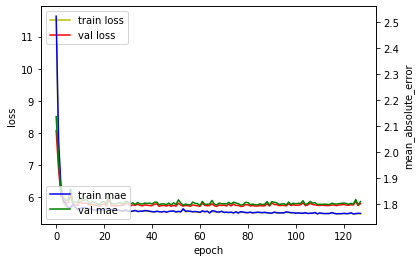

In [22]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['mae'], 'b', label='train mae')
acc_ax.plot(hist.history['val_mae'], 'g', label='val mae')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean_absolute_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [23]:
model.save("second_linear_model.h5")